# tools.ipynb
This module contains tools that are used in whole work.

In [7]:
import pandas as pd

def get_data(file:str = "Air_Quality.csv"):
    '''This function reads the data from the csv file and returns it as a pandas dataframe.'''
    data = pd.read_csv(file)
    return data

def get_clean_data(file:str = "Air_Quality.csv"):
    '''This function reads the data from get_data function, cleans it, and returns it as a pandas dataframe.'''
    data = get_data(file)
    clean_data = data.drop(columns=['Message'])
    clean_data = clean_data.dropna(subset=['Geo Join ID', 'Geo Place Name'])
    clean_data['Start_Date'] = pd.to_datetime(clean_data['Start_Date'])

    return clean_data

In [8]:
data = get_clean_data('Air_Quality.csv')
path = 'Air_Quality.csv'

In [9]:

def get_top_pollutants(data, top_n=10):
    """
    Get the top N most common air pollutants from the given dataset.

    Parameters:
    data (DataFrame): The input DataFrame containing air pollutant data.
    top_n (int): The number of top pollutants to return. Default is 10.

    Returns:
    DataFrame: A DataFrame containing the top N most common air pollutants.
    """
    pollutant_counts = data.groupby('Name').size().reset_index(name='Count')
    most_common_pollutants = pollutant_counts.sort_values(by='Count', ascending=False)
    return most_common_pollutants.head(top_n)

In [10]:
get_top_pollutants(data=data)

,Name,Count
13,Nitrogen dioxide (NO2),5922
12,Fine particles (PM 2.5),5922
16,Ozone (O3),2115
3,Asthma emergency department visits due to PM2.5,480
4,Asthma emergency departments visits due to Ozone,480
5,Asthma hospitalizations due to Ozone,480
0,Annual vehicle miles traveled,321
2,Annual vehicle miles traveled (trucks),321
1,Annual vehicle miles traveled (cars),321
11,Deaths due to PM2.5,240


In [11]:
def plot_top_pollutants(data_path, top_n=10):
    """
    Plot the top N most common air pollutants from the given dataset.

    Parameters:
    data_path (str): The file path to the input CSV file containing air pollutant data.
    top_n (int): The number of top pollutants to display in the plot. Default is 10.
    """

    data = get_clean_data(data_path)
    

    most_common_pollutants = get_top_pollutants(data, top_n=top_n)

    most_common_pollutants['ShortName'] = most_common_pollutants['Name'].apply(lambda x: x[:15] + '...' if len(x) > 15 else x)
    

    labels = most_common_pollutants['ShortName'] + ' (' + most_common_pollutants['Name'] + ')'
    

    plt.figure(figsize=(10, 6))
    plt.pie(most_common_pollutants['Count'], labels=labels, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(labels))))
    plt.title(f'Top {top_n} Most Common Air Pollutants')
    plt.show()



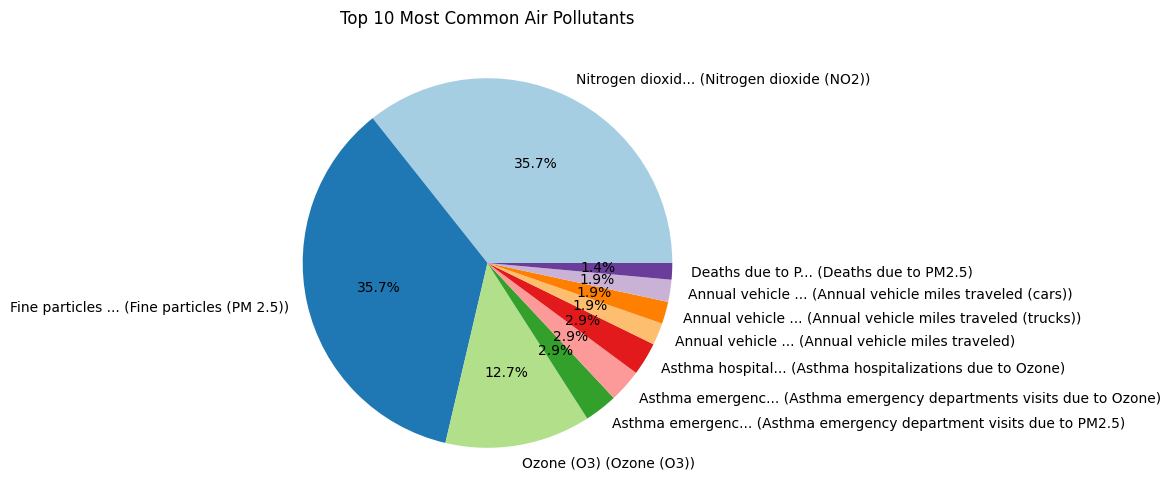

In [12]:
plot_top_pollutants(path)

In [15]:
def get_monthly_trends(data):
    """
    Calculate monthly average pollutant levels.

    Parameters:
    data (DataFrame): The input DataFrame containing air pollutant data.

    Returns:
    DataFrame: A DataFrame containing monthly average pollutant levels.
    """
    data['Month'] = data['Start_Date'].dt.to_period('M')
    monthly_trends = data.groupby('Month')['Data Value'].mean().reset_index()
    monthly_trends['Month'] = monthly_trends['Month'].dt.to_timestamp()
    return monthly_trends

In [16]:
get_monthly_trends(data=data)

,Month,Data Value
0,2005-01-01,41.013712
1,2008-12-01,20.284752
2,2009-01-01,41.389583
3,2009-06-01,21.244681
4,2009-12-01,17.812057
5,2010-01-01,48.056698
6,2010-06-01,21.691962
7,2010-12-01,19.545035
8,2011-01-01,1.897196
9,2011-06-01,21.173522


In [17]:
def plot_monthly_trends(data_path):
    """
    Plot monthly average pollutant levels.

    Parameters:
    data_path (str): The file path to the input CSV file containing air pollutant data.
    """
    data = get_clean_data(data_path)
    monthly_trends = get_monthly_trends(data)

    plt.figure(figsize=(12, 8))
    plt.plot(monthly_trends['Month'], monthly_trends['Data Value'], marker='o')
    plt.title('Monthly Average Pollutant Levels')
    plt.xlabel('Month')
    plt.ylabel('Average Pollutant Level')
    plt.grid(True, linestyle='--', linewidth=0.5)
    
    plt.xticks(ticks=monthly_trends['Month'], labels=monthly_trends['Month'].dt.strftime('%Y-%m'), rotation=45)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()


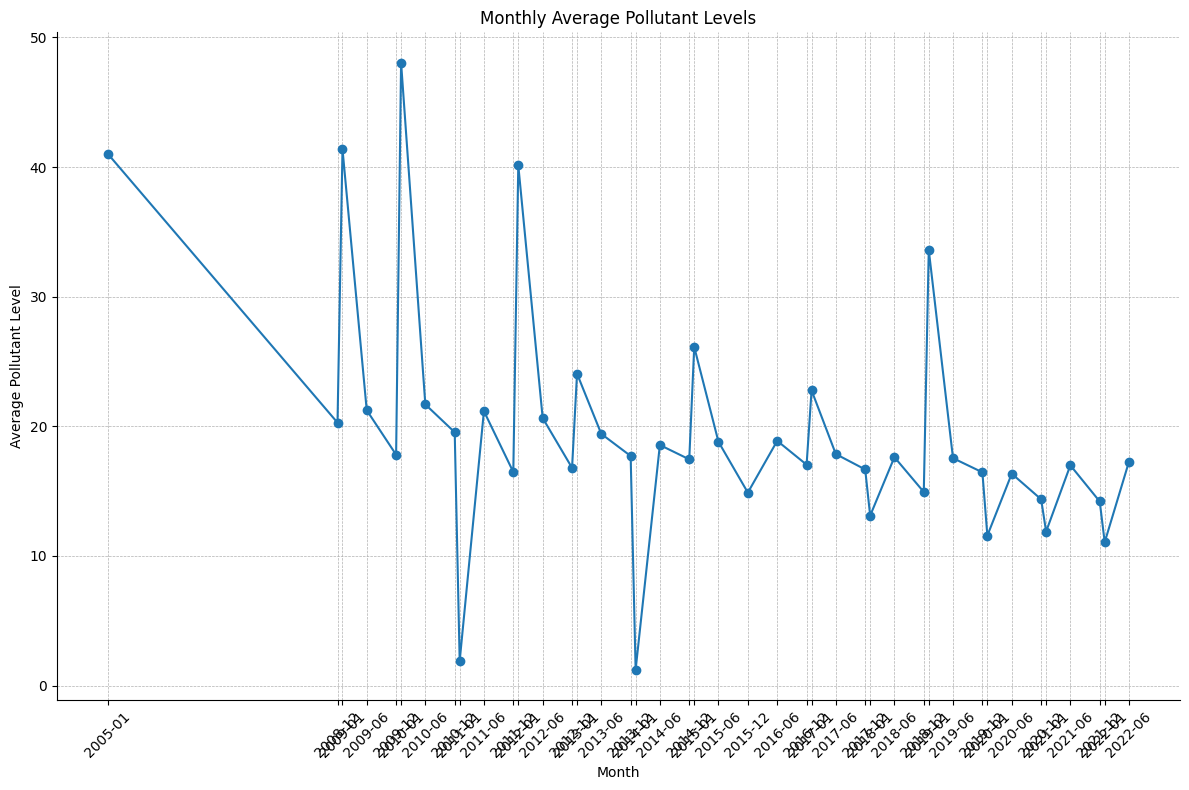

In [18]:
plot_monthly_trends(path)